<a href="https://colab.research.google.com/github/kahramanelif/MoMA-artwork-analysis/blob/master/moma_artworkanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Code to read csv file into Colaboratory: 
# resource : https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
import pandas as pd
import numpy as np

artworks = 'https://drive.google.com/open?id=1YRZg8nHhGFddxziM-G3Qisa4rJmSMnp1'
artists  = 'https://drive.google.com/open?id=1XxtTP0lI73fgneKv8gUKbvtKC-I8oxzU'

fluff, id = artworks.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('artworks.csv')  
dfartwork = pd.read_csv('artworks.csv')

# Dataset is now stored in a Pandas Dataframe

fluff, id = artists.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('artists.csv')  
dfartists = pd.read_csv('artists.csv')

# Dataset is now stored in a Pandas Dataframe

1YRZg8nHhGFddxziM-G3Qisa4rJmSMnp1


InvalidConfigError: ignored

In [0]:
joint_df = pd.concat([dfartists,dfartwork],join='inner',keys='Artist ID')


In [0]:
# which artist has the most artworks at MoMa?
# top 50 artists have most artworks

joint_df.Name.value_counts()[:50]

Eugène Atget                   5051
Louise Bourgeois               3319
Ludwig Mies van der Rohe       2567
Unknown photographer           1576
Jean Dubuffet                  1436
Lee Friedlander                1318
Pablo Picasso                  1311
Marc Chagall                   1163
Henri Matisse                  1064
Pierre Bonnard                  895
Lilly Reich                     824
Frank Lloyd Wright              800
George Maciunas                 763
August Sander                   750
Unknown Artist                  684
Georges Rouault                 633
Émile Bernard                   632
Ben Kinmont                     598
Aristide Maillol                580
André Derain                    574
Sol LeWitt                      558
Raoul Dufy                      546
Maurice Denis                   505
Dorothea Lange                  489
Unknown Designer                465
Joan Miró                       463
Pierre Alechinsky               430
Jan Dibbets                 

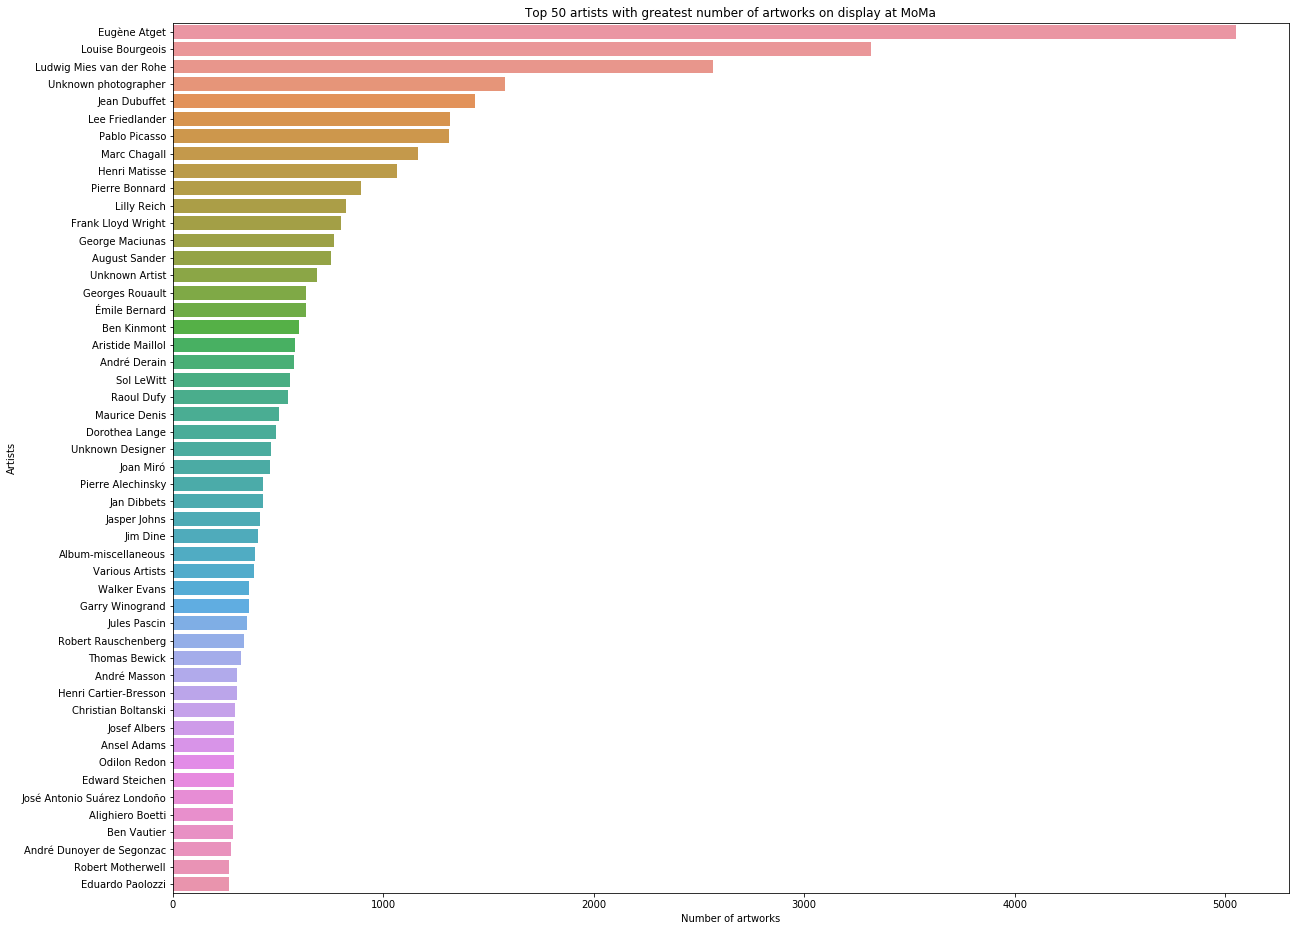

In [0]:


import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

%matplotlib inline

def plot_val_counts(df,column='Name',figsize=(20,16),title=None):
    counts = df[column].value_counts()[:50]
    plt.figure(figsize=figsize)
    sns.barplot(counts.values,counts.index)

    plt.xlabel('Number of artworks')
    plt.ylabel('Artists')
    plt.xticks(rotation=0)
    plt.title(title)
    plt.show()

plot_val_counts(joint_df,title='Top 50 artists with greatest number of artworks on display at MoMa')